In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sum_log', '_mean', '_median', '_max', '_min', '_var', '_mode', 
    '_25th', '_75th', '_hmean', '_gmean',
    '_2nd_moment', '_3rd_moment', '_entropy', '_sort_0',
    '_sort_1', '_sort_2', '_sort_3', '_sort_4', '_sort_5', '_sort_6',
    '_sort_7', '_sort_8', '_sort_9', '_sort_10', '_sort_11', '_sort_12',
    '_sort_13', '_sort_14', '_sort_15', '_sort_16', '_sort_17', '_sort_18',
    '_sort_19'
]
train = train.drop(columns=feats_to_drop)

In [5]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

del train

In [6]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)

# Training

In [7]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 10,
    presets="good_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    keep_only_best=True,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240522_061724"
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 367. Best iteration is:
	[367]	valid_set's l2: 0.000359853	valid_set's r2: -80.6784
	Ran out of time, early stopping on iteration 377. Best iteration is:
	[361]	valid_set's l2: 0.000360504	valid_set's r2: -81.6032
	Ran out of time, early stopping on iteration 393. Best iteration is:
	[392]	valid_set's l2: 0.000359175	valid_set's r2: -81.0588
	Ran out of time, early stopping on iteration 406. Best iteration is:
	[396]	valid_set's l2: 0.000357652	valid_set's r2: -80.7859
	Ran out of time, early stopping on iteration 411. Best iteration is:
	[408]	valid_set's l2: 0.000357158	valid_set's r2: -81.2595
	Ran out of time, early stopping on iteration 43

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 145. Best iteration is:
	[145]	valid_set's l2: 0.000737512	valid_set's r2: -80.6615
	Ran out of time, early stopping on iteration 151. Best iteration is:
	[150]	valid_set's l2: 0.000709074	valid_set's r2: -81.5866
	Ran out of time, early stopping on iteration 155. Best iteration is:
	[155]	valid_set's l2: 0.000689085	valid_set's r2: -81.0595
	Ran out of time, early stopping on iteration 161. Best iteration is:
	[161]	valid_set's l2: 0.000666177	valid_set's r2: -80.7881
	Ran out of time, early stopping on iteration 167. Best iteration is:
	[167]	valid_set's l2: 0.000642165	valid_set's r2: -81.258

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 347.
	Ran out of time, early stopping on iteration 352.
	Ran out of time, early stopping on iteration 365.
	Ran out of time, early stopping on iteration 391.
	Ran out of time, early stopping on iteration 403.
	Ran out of time, early stopping on iteration 434.
	Ran out of time, early stopping on iteration 466.
	Ran out of time, early stopping on iteration 579.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8683	 = Validation score   (r2)
	733.61s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 770.81s of the 5988.05s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8691	 = Validation score   (r2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8688	 = Validation score   (r2)
	736.14s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 770.81s of the 4525.27s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6116	 = Validation score   (r2)
	150.13s	 = Training   runtime
	1.3s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 599.52s of the 4372.38s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L1': 0.455, 'RandomForestMSE_BAG_L1': 0.273, 'XGBoost_BAG_L1/T1': 0.273}
	0.8692	 = Validation score   (r2)
	4.25s	 = Training   runtime
	0.02s	 = Validation runtime
Excluded models: ['FASTAI', 'NN_TORCH'] (Specified by `excluded_model_types`)
Fitting 7 L2 models ...
Hyperparameter tuning model: LightGBMXT

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 138. Best iteration is:
	[114]	valid_set's l2: 0.000345185	valid_set's r2: -81.5624
	Ran out of time, early stopping on iteration 151. Best iteration is:
	[128]	valid_set's l2: 0.000340502	valid_set's r2: -81.6955
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	0.857	 = Validation score   (r2)
	230.44s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T2 ...
	0.8647	 = Validation score   (r2)
	238.58s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 561.61s of the 3895.36s of remaining time.


  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	0.7073	 = Validation score   (r2)
	161.91s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	0.6739	 = Validation score   (r2)
	141.57s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	0.6675	 = Validation score   (r2)
	161.72s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L2 ... Tuning model for up to 561.61s of the 3426.3s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForestMSE_BAG_L2 ..

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 207.
	Ran out of time, early stopping on iteration 218.
	Ran out of time, early stopping on iteration 225.
	Ran out of time, early stopping on iteration 237.
	Ran out of time, early stopping on iteration 245.
	Ran out of time, early stopping on iteration 267.
	Ran out of time, early stopping on iteration 295.
	Ran out of time, early stopping on iteration 350.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8689	 = Validation score   (r2)
	533.54s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 561.61s of the 2367.61s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	0.8693	 = Validation score   (r2

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	0.8692	 = Validation score   (r2)
	535.44s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 561.61s of the 1217.19s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6707	 = Validation score   (r2)
	210.02s	 = Training   runtime
	1.75s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 436.8s of the 1002.39s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L2': 0.412, 'XGBoost_BAG_L2/T1': 0.294, 'ExtraTreesMSE_BAG_L1': 0.118, 'RandomForestMSE_BAG_L1': 0.059, 'XGBoost_BAG_L1/T1': 0.059, 'RandomForestMSE_BAG_L2': 0.059}
	0.8694	 = Validation score   (r2)
	5.45s	 = Training   runtime
	0.02s	 = Validation runtime
AutoGluon training complete, total runtime = 8003

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's l2: 0.00034801	valid_set's r2: -81.2778


	Ran out of time, early stopping on iteration 1179. Best iteration is:
	[1133]	valid_set's l2: 0.000347206	valid_set's r2: -81.2763


[1000]	valid_set's l2: 0.000349938	valid_set's r2: -81.0179


	Ran out of time, early stopping on iteration 1222. Best iteration is:
	[1085]	valid_set's l2: 0.000349474	valid_set's r2: -81.0176


[1000]	valid_set's l2: 0.000353687	valid_set's r2: -81.7882


	Ran out of time, early stopping on iteration 1256. Best iteration is:
	[1253]	valid_set's l2: 0.000351681	valid_set's r2: -81.7867


[1000]	valid_set's l2: 0.000349593	valid_set's r2: -81.4632


	Ran out of time, early stopping on iteration 1840. Best iteration is:
	[1822]	valid_set's l2: 0.000345404	valid_set's r2: -81.4574


[1000]	valid_set's l2: 0.000351254	valid_set's r2: -81.0095
[2000]	valid_set's l2: 0.000347526	valid_set's r2: -81.0084


	Ran out of time, early stopping on iteration 2057. Best iteration is:
	[1829]	valid_set's l2: 0.000348089	valid_set's r2: -81.0078


[1000]	valid_set's l2: 0.000351693	valid_set's r2: -81.1809
[2000]	valid_set's l2: 0.000347827	valid_set's r2: -81.1795


	Ran out of time, early stopping on iteration 2482. Best iteration is:
	[2070]	valid_set's l2: 0.000347627	valid_set's r2: -81.1792
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	0.8658	 = Validation score   (r2)
	2257.72s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 2352.52s of the 25192.92s of remaining time.


  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 138. Best iteration is:
	[99]	valid_set's l2: 0.00083028	valid_set's r2: -81.274
	Ran out of time, early stopping on iteration 143. Best iteration is:
	[99]	valid

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 956.
	Ran out of time, early stopping on iteration 993.
	Ran out of time, early stopping on iteration 1032.
	Ran out of time, early stopping on iteration 1070.
	Ran out of time, early stopping on iteration 1129.
	Ran out of time, early stopping on iteration 1201.
	Ran out of time, early stopping on iteration 1317.
	Ran out of time, early stopping on iteration 1562.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8689	 = Validation score   (r2)
	2251.1s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 2352.52s of the 18292.26s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8691	 = Validation sco

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8689	 = Validation score   (r2)
	2255.27s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 2352.52s of the 14929.77s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.6136	 = Validation score   (r2)
	168.41s	 = Training   runtime
	1.45s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 1829.74s of the 14757.75s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L1': 0.357, 'RandomForestMSE_BAG_L1': 0.286, 'XGBoost_BAG_L1/T1': 0.286, 'CatBoost_BAG_L1/T1': 0.071}
	0.8693	 = Validation score   (r2)
	4.87s	 = Training   runtime
	0.02s	 = Validation runtime
Excluded models: ['FASTAI', 'NN_TORCH'] (Specified by `excluded_model_types`)
Fitting 7 L2 models ...
Hype

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 108. Best iteration is:
	[77]	valid_set's l2: 0.000516389	valid_set's r2: -81.0576
	Ran out of time, early stopping on iteration 113. Best iteration is:
	[105]	valid_set's l2: 0.000412663	valid_set's r2: -81.4535
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L2/T1 ...
	0.79	 = Validation score   (r2)
	191.56s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T2 ...
	0.8

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	0.6567	 = Validation score   (r2)
	177.78s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	0.6534	 = Validation score   (r2)
	162.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	0.6327	 = Validation score   (r2)
	183.84s	 =

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 647.
	Ran out of time, early stopping on iteration 659.
	Ran out of time, early stopping on iteration 706.
	Ran out of time, early stopping on iteration 694.
	Ran out of time, early stopping on iteration 735.
	Ran out of time, early stopping on iteration 775.
	Ran out of time, early stopping on iteration 858.
	Ran out of time, early stopping on iteration 1030.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.8691	 = Validation score   (r2)
	1815.28s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 1896.79s of the 7450.57s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L2 ...
	0.8694	 = Validation score   

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	0.8692	 = Validation score   (r2)
	917.32s	 = Training   runtime
	0.01s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	0.8693	 = Validation score   (r2)
	937.89s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 1896.79s of the 4178.48s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.655	 = Validation score   (r2)
	233.77s	 = Training   runtime
	1.92s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 1475.28s of the 3938.48s of remaining time.
	Ensemble Weights: {'ExtraTreesMSE_BAG_L2': 0.545, 'XGBoost_BAG_L2/T2': 0.182, 'ExtraTreesMSE_BAG_L1': 0.091, 'XGBoost_BAG_L1

In [8]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

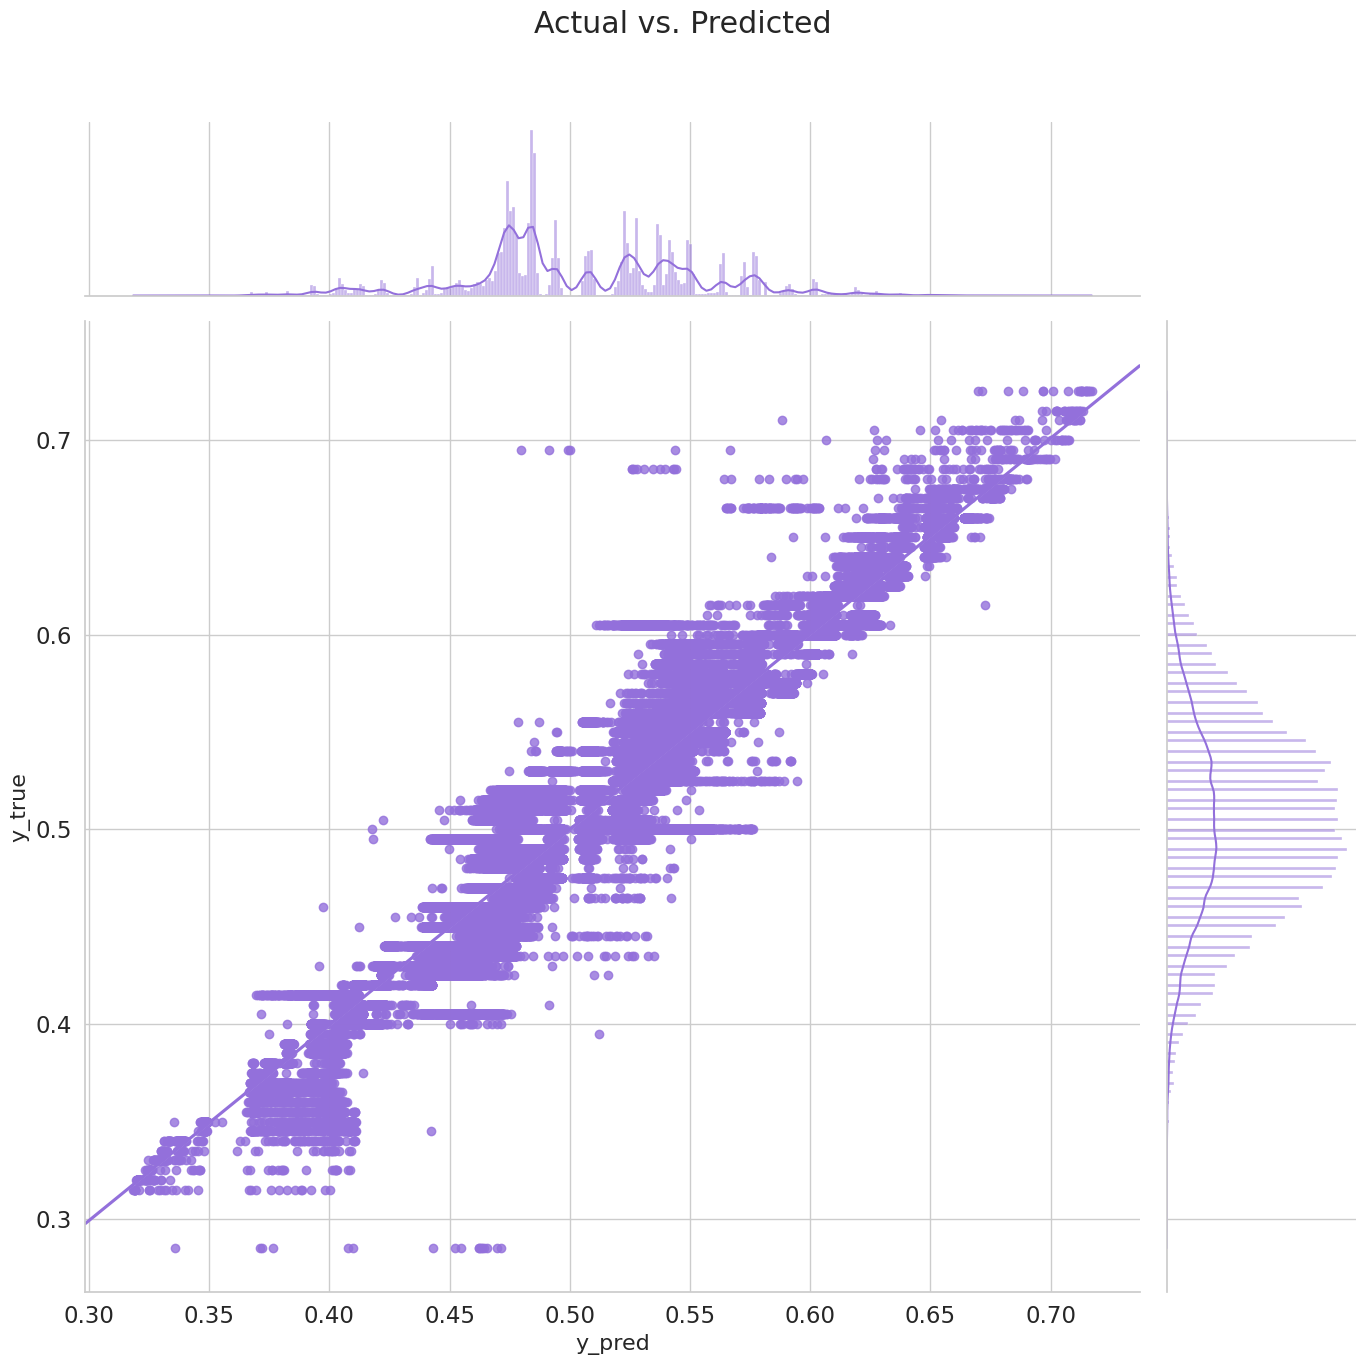

In [9]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [10]:
score = predictor.evaluate(_val, silent=True)['r2']

In [11]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8694923407264809


In [12]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_cnt18', '_cnt19', '_cnt22']


In [13]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3_FULL,0.869492,None,r2,23.267090,nan,7459.676724,0.007548,nan,6.518180,3,True,19
1,ExtraTreesMSE_BAG_L2_FULL,0.869489,None,r2,21.277820,nan,5541.603981,2.909273,69.462348,1339.874084,2,True,17
2,XGBoost_BAG_L2/T2_FULL,0.869379,None,r2,19.125420,nan,4235.048655,0.756873,nan,33.318758,2,True,18
3,RandomForestMSE_BAG_L2_FULL,0.869354,None,r2,19.593396,nan,6079.965702,1.224849,28.871361,1878.235805,2,True,16
4,ExtraTreesMSE_BAG_L1_FULL,0.869266,None,r2,3.110440,60.917029,1041.077558,3.110440,60.917029,1041.077558,1,True,1
5,RandomForestMSE_BAG_L1_FULL,0.869151,None,r2,3.110199,65.890940,2300.105650,3.110199,65.890940,2300.105650,1,True,13
6,XGBoost_BAG_L1/T1_FULL,0.868904,None,r2,1.643497,nan,42.310141,1.643497,nan,42.310141,1,True,2
7,CatBoost_BAG_L1/T1_FULL,0.868877,None,r2,0.106598,nan,327.410386,0.106598,nan,327.410386,1,True,14
8,LightGBMXT_BAG_L1/T1_FULL,0.866420,None,r2,8.345146,nan,272.448525,8.345146,nan,272.448525,1,True,3
9,LightGBM_BAG_L1/T4_FULL,0.822737,None,r2,0.995102,nan,92.483030,0.995102,nan,92.483030,1,True,7


In [14]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,1.598327,0.017225,0.000000,5,1.633795,1.562860
_special1,0.001862,0.000195,0.000014,5,0.002263,0.001462
_std,0.001480,0.000302,0.000198,5,0.002102,0.000857
_cnt15,0.000783,0.000356,0.003978,5,0.001516,0.000050
_cnt14,0.000586,0.000481,0.026360,5,0.001577,-0.000404
_skew,0.000492,0.000085,0.000101,5,0.000666,0.000318
_40th,0.000273,0.000119,0.003417,5,0.000519,0.000028
_cnt7,0.000181,0.000107,0.009667,5,0.000401,-0.000039
_70th,0.000180,0.000137,0.021497,5,0.000463,-0.000103
_80th,0.000170,0.000114,0.014671,5,0.000405,-0.000066


# Making Predictions and Creating a Submission File

In [15]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [16]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578605
1117958,1117958,0.454697
1117959,1117959,0.448036
1117960,1117960,0.466481
1117961,1117961,0.466138


In [17]:
shutil.rmtree("AutogluonModels")